## Data Anlytics Project

This is a Portfolio project with the intent of showing the use of different tools such as Jupyter Notebooks and Python including lybraries as Numpy and Pandas. I'll be using a dataset from Kaggle donwloaded as a csv document.

## Context
We are exploring an updated and expanded earthquake inventory only for Greece, dating back to 1965, which will be updated annually with the preceding year's earthquake events.

## Exploring data
Let us start with the basics: import libraries and the dataset itself.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

In [2]:
df = pd.read_csv('/Users/vic/Documents/Programación/Data Analytics/Data Analytics Project 2/Earthquakes.csv')

Now lets explore the dataset and what information it does provide:

In [3]:
df.head()

,DATETIME,LAT,LONG,DEPTH,MAGNITUDE
0,1/7/1965 10:22,36.50,26.50,10,5.3
1,1/10/1965 8:02,39.25,22.25,10,4.9
2,1/12/1965 17:26,37.00,22.00,10,4.0
3,1/15/1965 14:56,36.75,21.75,10,4.5
4,3/9/1965 19:16,39.00,24.00,10,4.2


**About Units** : When working with scientific data is always important to have in mind the units we are working with. Date and time might be self explanatory, but how are we measuring other variables? In this case, latitud and longitud are expressed in the DMS system, Depth is in Kilometers and Magnitude is measured in the Richter scale. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251263 entries, 0 to 251262
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DATETIME   251263 non-null  object 
 1   LAT        251263 non-null  float64
 2   LONG       251263 non-null  float64
 3   DEPTH      251263 non-null  int64  
 4   MAGNITUDE  251263 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.6+ MB


In [7]:
df.describe()

,LAT,LONG,DEPTH,MAGNITUDE
count,251263.000000,251263.000000,251263.000000,251263.000000
mean,38.192555,22.742393,15.656718,2.179961
std,1.254266,1.759766,11.969374,0.823466
min,34.704900,19.290000,0.000000,0.000000
25%,37.750000,21.580000,9.000000,1.500000
50%,38.320000,22.210000,13.000000,2.000000
75%,38.800000,23.640000,19.000000,2.900000
max,41.550000,29.710000,244.000000,6.700000


Since we are working with earthquakes located only in Greece, latitud and longitud columns are making a lot of sence: the mean is 38.19° N and 22.74° E (a quick google search demonstrates that Greece coordenates are 39.07° N, 21.82° E)  with a very low standard deviation, which means that location info is very much concentrated. 

Depth is much more variable: ranging from 0 Km to 244 Km and a std of 15.66 Km, we can appreciate a very lenghty range, which, for earthquakes, makes perfect sense. We can explore what a 0.0 KM depth actually means later. 

Magnitude is measured in the Richter scale, which has a very small range: goes from 0 to 6.7 . The Richter scale is logaritmic in nature which means that progression is very aggresive: bellow 2.5 earthquakes aren't felt but can be recorded, up to 5.4 are felt and can do minor damage and from 5.5 up the danger scalates. 
We can see that Greece actually suffered a 6.7 earthquake and was the more intense in its recent history. We can make a guess and think this was the 2006 Kythira earthquake, but lets put a pin in this assumption for later confirmation.

**Relevant questions of our dataset**:</br>

-How do earthquakes distribute in time? </br>
-Which is the most frequent magnitude? and depth?</br>
-Is there a correlation between magnitude and depth?</br>
-What information can we obtain about the 6.7 earthquake? is it the Kythira earthquake or other event?</br>


We will try to answer this questions, but first we have to verify our data is in order.

## Data cleaning

Lets check if there are any null or empty values in the dataframe:

In [4]:
pd.isnull(df).any()

DATETIME     False
LAT          False
LONG         False
DEPTH        False
MAGNITUDE    False
dtype: bool

in 251263 entries there aren't any null values. 

Our previous data exploration asured us that the range of the values made sense in context, but lets check for unique values for other outliers.

In [5]:
df['MAGNITUDE'].unique()

array([5.3, 4.9, 4. , 4.5, 4.2, 4.4, 4.8, 5.1, 4.6, 4.1, 3.8, 3.3, 3.6,
       3.4, 3.9, 3.2, 3.7, 3.5, 4.3, 2.8, 3.1, 5.2, 5.4, 2.9, 2.7, 5.9,
       5. , 4.7, 3. , 5.5, 6. , 2.4, 1.7, 2.6, 2.5, 6.7, 5.6, 1.9, 2.1,
       6.1, 2.2, 1.6, 2. , 1.5, 5.8, 2.3, 1.8, 6.3, 6.4, 5.7, 6.6, 1.4,
       1.3, 1.2, 6.5, 1. , 6.2, 0.7, 0.9, 1.1, 0.8, 0. , 0.6, 0.3, 0.5,
       0.4, 0.2, 0.1])

The 0. value is strange at first glance, but remember that the Richter Scale starts at 0 and that measurement instruments have an asociated error margin. This just means than an 0 magnitude earthqueake is a very faint, weak one. 

**Cheking for duplicates**:

In [82]:
df.duplicated().any()

True

In [83]:

df[df.duplicated() == True]

,DATETIME,LAT,LONG,DEPTH,MAGNITUDE
69025,8/28/2010 23:35,38.66,23.37,13,2.7
69088,8/30/2010 10:10,38.75,21.09,5,3.0
72429,12/19/2010 13:53,40.28,21.92,5,2.7
73116,1/12/2011 2:06,35.99,25.32,28,3.1
73734,1/27/2011 23:08,37.87,22.97,6,1.7
83339,10/8/2011 20:16,36.40,25.38,3,1.1
92082,3/15/2012 21:30,38.17,21.72,26,1.6
113458,5/31/2013 10:57,38.22,22.11,10,1.4
118749,8/15/2013 8:24,38.69,22.68,2,1.2
146605,10/15/2014 5:57,39.22,22.94,8,0.8


We have 11 duplicates. Now, many of these cand be inmediate aftershocks that happen seconds appart or subtle tremors (most of them have very low magnitude and are quite shallow) . We can treat them like redundant information and drop them.

In [84]:
df = df.drop_duplicates()
df.duplicated().any()

False

**Datetime** </br>
The Datetime column has a type of object. I want to convert it to a date time type so we can interact with the year property.

In [86]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'],infer_datetime_format=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251252 entries, 0 to 251262
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DATETIME   251252 non-null  datetime64[ns]
 1   LAT        251252 non-null  float64       
 2   LONG       251252 non-null  float64       
 3   DEPTH      251252 non-null  int64         
 4   MAGNITUDE  251252 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 11.5 MB


Without duplicates, nonsensicall values nor null cells, we can continue with our analysis.

## High magnitude earthquakes and the Kythira earthquake of 2006.

Lets find the earthquakes with the highest mangnitude:

In [122]:
df[df['MAGNITUDE'] >= 6.7]

,DATETIME,LAT,LONG,DEPTH,MAGNITUDE
479,1968-02-19 22:45:00,39.5000,24.8000,10,6.7
226371,2020-10-30 11:51:00,37.9001,26.8167,12,6.7


We have two 6.7 Magnitude earthquakes, but none of the ocurred in 2006. Lets search by year then and try find earthqueakes in 2006:

In [23]:
df[df['DATETIME'].dt.year == 2006]

,DATETIME,LAT,LONG,DEPTH,MAGNITUDE
39050,2006-01-01 00:08:00,37.65,24.29,31,3.1
39051,2006-01-01 08:45:00,38.74,26.27,10,3.0
39052,2006-01-01 09:25:00,37.44,23.79,10,3.4
39053,2006-01-01 09:54:00,39.30,25.49,10,3.4
39054,2006-01-01 15:22:00,39.93,24.45,29,3.0
...,...,...,...,...,...
42633,2006-12-31 08:34:00,38.04,20.64,5,3.2
42634,2006-12-31 12:13:00,40.25,23.83,33,2.9
42635,2006-12-31 17:57:00,37.90,21.15,15,3.6
42636,2006-12-31 20:12:00,38.31,21.37,45,3.0


2006 had 3588 data entries! let's narrow this down.

In [125]:
df_2006 = df[df['DATETIME'].dt.year == 2006]
df_2006[df_2006['MAGNITUDE']  > 6]

,DATETIME,LAT,LONG,DEPTH,MAGNITUDE
39105,2006-01-08 11:34:00,36.21,23.41,69,6.4


**This is the one!** </br>
This is the entry that most resembles the data available for the Kythira Earthquake! The date and time are spot on and also the location, though the Depth and Magnitude are just a bit off of what Wikipedia says. 

## Graphics and visualization

Lets go back to our initial questions:</br>
-How do earthquakes distribute in time?</br>
-Which is the most frequent magnitude? and depth?</br>
-Is there a correlation between magnitude and depth?</br>


The easiest way to answer them is by ploting the data into graphics.

**Earthquake distribution in time**

In [87]:
df_pltime = pd.DataFrame({
    'Earthquakes': df['DATETIME'].dt.year.value_counts()
})

In [88]:
df_pltime = df_pltime.sort_index(axis=0)

Text(0.5, 1.0, 'Ocurrence of earthquakes in Greece since 1964')

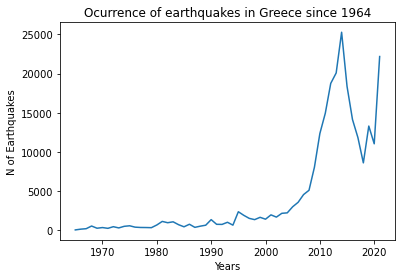

In [89]:
fig, ax = plt.subplots()  
ax.plot(df_pltime.index, df_pltime['Earthquakes'])
ax.set_xlabel('Years') 
ax.set_ylabel('N of Earthquakes')
ax.set_title("Ocurrence of earthquakes in Greece since 1964")  

**Frequency of Magnitude and Depth** :

In [94]:
df_plm = pd.DataFrame({
    'FrequencyM':df['MAGNITUDE'].value_counts()
})

In [95]:
df_plm = df_plm.sort_index(axis=0)

In [96]:
df_pld = pd.DataFrame({
    'FrequencyD':df['DEPTH'].value_counts()
})

In [99]:
df_pld = df_pld.sort_index(axis=0)

Text(0.5, 0.98, 'Frequency of Depth and magnitude')

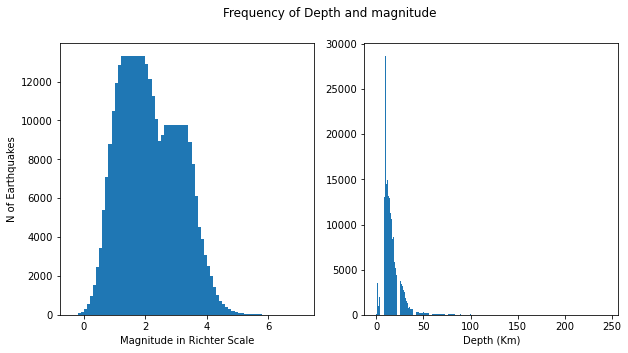

In [106]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
axs[0].bar(df_plm.index, df_plm['FrequencyM'])
axs[1].bar(df_pld.index, df_pld['FrequencyD'])
axs[0].set_xlabel('Magnitude in Richter Scale') 
axs[0].set_ylabel('N of Earthquakes')
axs[1].set_xlabel('Depth (Km)') 
fig.suptitle('Frequency of Depth and magnitude')

**Correlation between depth and magnitude**:

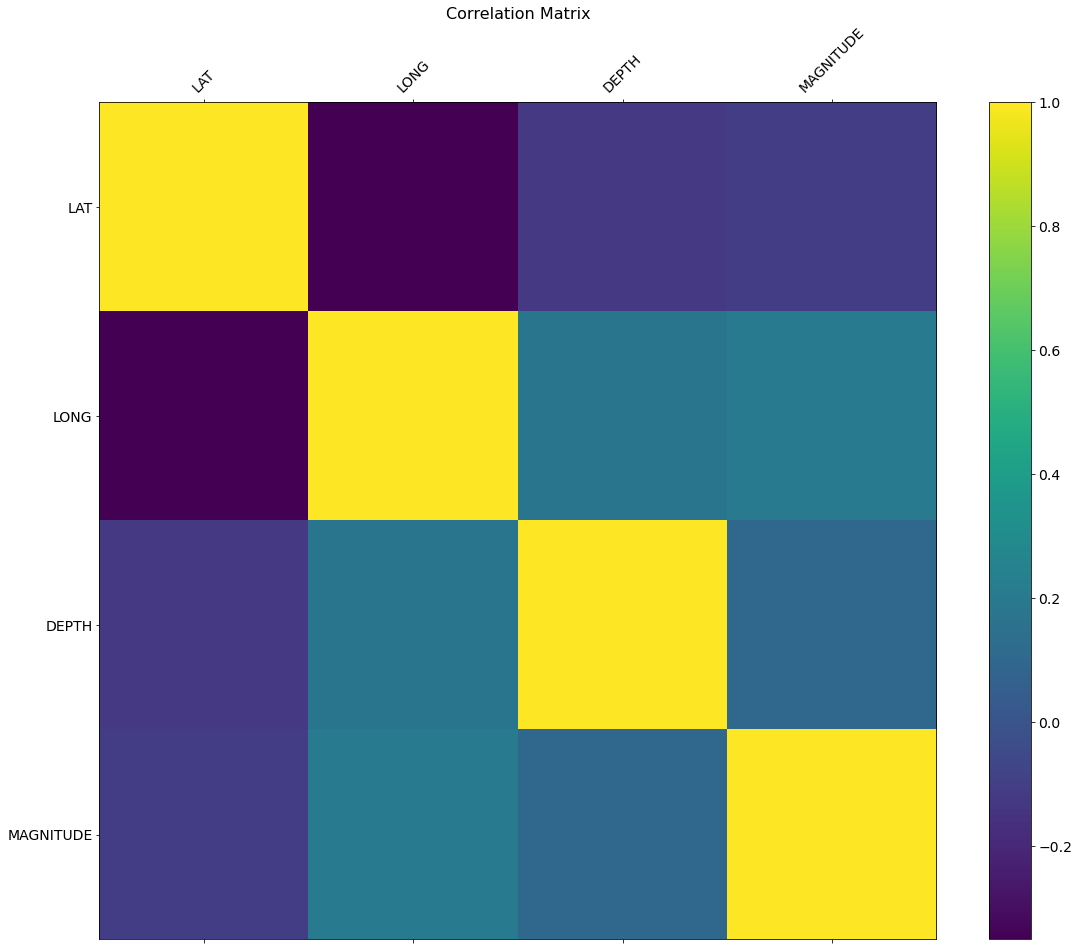

In [112]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

There seems to be a very low correlation between Depth and Magnitude. We can also appreciate that there is more correlation between Magnitude and Depth and Longitude. This might be due to the greek terrain itself: there's more variation in tectonic diversity in a East-West axis which might explain how eathquakes are stronger in the west than in the east due to the presence of the Pindus mountain range.